Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
from sklearn import metrics
from sklearn import datasets

import sys
sys.path.append("./poker")
plt.rcParams['figure.figsize'] = (15, 10)

Using TensorFlow backend.


# Load the Data

In [2]:
X_train = np.load('./poker/X_train.npy')
y_train = np.load('./poker/y_train.npy')
X_test = np.load('./poker/X_test.npy')
y_test = np.load('./poker/y_test.npy')
X_deploy = np.load('./poker/X_deploy.npy')
y_deploy = np.load('./poker/y_deploy.npy')

print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)
print 'Number of testing examples',len(X_deploy)

Number of training examples 20008
Number of validation examples 5002
Number of testing examples 1000000


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [4]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test) 
labelsDepy = np_utils.to_categorical(y_deploy)                                                                                         
model = Sequential()
model.add(Dense(25,
                input_shape=(10,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.load_weights('/Users/salemameen/Desktop/banditsbook/python_poker/pokerModelbest.hdf5')
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [5]:
# MAB_NN(4%REMOVED) MODEL1    1               
model1 = Sequential()
model1.add(Dense(25,
                input_shape=(10,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model1.add(Dense(10, activation="softmax"))
model1.load_weights('/Users/salemameen/Desktop/banditsbook/python_poker/IrisUCB1/spam0.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [6]:
# MAB_NN(20%REMOVED) MODEL2 5
model2 = Sequential()
model2.add(Dense(25,
                input_shape=(10,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model2.add(Dense(10, activation="softmax"))
model2.load_weights('/Users/salemameen/Desktop/banditsbook/python_poker/IrisUCB1/spam4.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [7]:
# MAB_NN(64%REMOVED) MODEL3 16
model3 = Sequential()
model3.add(Dense(25,
                input_shape=(10,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model3.add(Dense(10, activation="softmax"))
model3.load_weights('/Users/salemameen/Desktop/banditsbook/python_poker/IrisUCB1/spam15.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Deployment Time

In [8]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_deploy)
print("The time of KNN is           %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_deploy)
print("The time of LSVM is          %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_deploy)
print("The time of SVM is           %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_deploy)
print("The time of DT_gini is       %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_deploy)
print("The time of DT is            %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_deploy)
print("The time of Bagging Knn is   %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_deploy)
print("The time of Bagging DT is    %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_deploy)
print("The time of Random Forest is %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_deploy)
print("The time of Ada Boost is     %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_deploy)
print("The time of Naive Bayes is   %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_deploy)
print("The time of LDA is           %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_deploy)
print("The time of QDA is           %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_deploy)
print("The time of NN is            %s seconds " % (time.time() - start_time))
# NN 4% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_deploy)
print("The time of NN2.5 Removed is %s seconds " % (time.time() - start_time))
# NN 20% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_deploy)
print("The time of NN7.5 Removed is %s seconds " % (time.time() - start_time))
# NN 64% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_deploy)
print("The time of NN65 Removed is  %s seconds " % (time.time() - start_time))

The time of KNN is           106.825896025 seconds
The time of LSVM is          0.160895109177 seconds 
The time of SVM is           538.028733969 seconds 
The time of DT_gini is       0.218214035034 seconds 
The time of DT is            0.244822978973 seconds
The time of Bagging Knn is   80.6534810066 seconds
The time of Bagging DT is    2.48652601242 seconds 
The time of Random Forest is 2.78067493439 seconds 
The time of Ada Boost is     15.612582922 seconds 
The time of Naive Bayes is   1.32871103287 seconds 
The time of LDA is           0.105500936508 seconds 
The time of QDA is           1.4219558239 seconds 
1000000/1000000 [==============================] - 54s    
The time of NN2.5 Removed is 54.3826081753 seconds 
 999904/1000000 [============================>.] - ETA: 0sThe time of NN65 Removed is  56.1793339252 seconds 


# Accuracy of the models on Testing data

In [9]:
print "The accuracy of KNN:          \t", metrics.accuracy_score(y_deploy, y_pred_neigh)
print "The accuracy of LSVM:         \t", metrics.accuracy_score(y_deploy, y_pred_svm_linear)
print "The accuracy of SVM:          \t", metrics.accuracy_score(y_deploy, y_pred_svm)
print "The accuracy of DT_gini:      \t", metrics.accuracy_score(y_deploy, y_pred_gtgini)
print "The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_IG)
print "The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGKN)
print "The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGDT)
print "The accuracy of Random Forest:\t", metrics.accuracy_score(y_deploy, y_pred_dt_RF)
print "The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_deploy, y_pred_dt_AD)
print "The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_deploy, y_pred_NB)
print "The accuracy of LDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_LDA)
print "The accuracy of QDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_QDA)
print "The accuracy of NN:           \t", metrics.accuracy_score(y_deploy, y_pred_NN)
print "The accuracy of NN4R:         \t", metrics.accuracy_score(y_deploy, y_pred_NN1)
print "The accuracy of NN20R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN2)
print "The accuracy of NN64R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN3)

The accuracy of KNN:          	0.50773
The accuracy of LSVM:         	0.487642
The accuracy of SVM:          	0.547178
The accuracy of DT_gini:      	0.475596
The accuracy of DT_entorpy:   	0.493877
The accuracy of Bagging Knn:  	0.540813
The accuracy of Bagging DT:   	0.5335
The accuracy of Random Forest:	0.554584
The accuracy of Ada Boost:    	0.50277
The accuracy of Naive Bayes:  	0.50123
The accuracy of LDA:          	0.501209
The accuracy of QDA:          	0.545661
The accuracy of NN:           	0.56643
The accuracy of NN4R:         	0.566373
The accuracy of NN20R:        	0.564725
The accuracy of NN64R:        	0.524459


# Precision of the models on Testing data

In [10]:
print "Precision of KNN:          \t", metrics.precision_score(y_deploy, y_pred_neigh, average="macro")
print "Precision of LSVM:         \t", metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro")
print "Precision of SVM:          \t", metrics.precision_score(y_deploy, y_pred_svm, average="macro")
print "Precision of DT_gini:      \t", metrics.precision_score(y_deploy, y_pred_gtgini, average="macro")
print "Precision of DT_entorpy:   \t", metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro")
print "Precision Bagging Knn:     \t", metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "Precision of Bagging DT:   \t", metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "Precision of Random Forest:\t", metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro")
print "Precision of Ada Boost:    \t", metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro")
print "Precision of Naive Bayes:  \t", metrics.precision_score(y_deploy, y_pred_NB, average="macro")
print "Precision of LDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro")
print "Precision of QDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro")
print "Precision dataset of NN:   \t", metrics.precision_score(y_deploy, y_pred_NN, average="macro")
print "Precision of NN4R:         \t", metrics.precision_score(y_deploy, y_pred_NN1, average="macro")
print "Precision of NN20R:        \t", metrics.precision_score(y_deploy, y_pred_NN2, average="macro")
print "Precision of NN64R:        \t", metrics.precision_score(y_deploy, y_pred_NN3, average="macro")


Precision of KNN:          	0.158135942135
Precision of LSVM:         	

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0911882414028
Precision of SVM:          	0.107281539717
Precision of DT_gini:      	0.121052740792
Precision of DT_entorpy:   	0.1314520487
Precision Bagging Knn:     	0.125822847734
Precision of Bagging DT:   	0.243470686128
Precision of Random Forest:	0.224087713288
Precision of Ada Boost:    	0.0967906331037
Precision of Naive Bayes:  	0.0946749419495
Precision of LDA:          	0.0501209
Precision of QDA:          	0.107232761376
Precision dataset of NN:   	0.111423735197
Precision of NN4R:         	0.111337919689
Precision of NN20R:        	0.111122954512
Precision of NN64R:        	0.106516706362


# Recall of the models on Testing data

In [11]:
print "Recall of KNN :         \t", metrics.recall_score(y_deploy, y_pred_neigh, average="macro")
print "Recall of LSVM :        \t", metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro")
print "Recall of SVM :         \t", metrics.recall_score(y_deploy, y_pred_svm, average="macro")
print "Recall of DT_gini :     \t", metrics.recall_score(y_deploy, y_pred_gtgini, average="macro")
print "Recall of DT_entorpy:   \t", metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro")
print "Recall of Bagging Knn : \t", metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "Recall of Bagging DT :  \t", metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "Recall of Random Forest:\t", metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro")
print "Recall of Ada Boost :   \t", metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro")
print "Recall of Naive Bayes : \t", metrics.recall_score(y_deploy, y_pred_NB, average="macro")
print "Recall of LDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro")
print "Recall of QDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro")
print "Recall of NN :          \t", metrics.recall_score(y_deploy, y_pred_NN, average="macro")
print "Recall of NN4R:         \t", metrics.recall_score(y_deploy, y_pred_NN1, average="macro")
print "Recall of NN20R:        \t", metrics.recall_score(y_deploy, y_pred_NN2, average="macro")
print "Recall of NN64R:        \t", metrics.recall_score(y_deploy, y_pred_NN3, average="macro")


Recall of KNN :         	0.111623208394
Recall of LSVM :        	0.0993163795898
Recall of SVM :         	0.115370343137
Recall of DT_gini :     	0.121820461894
Recall of DT_entorpy:   	0.164598783737
Recall of Bagging Knn : 	0.113751504243
Recall of Bagging DT :  	0.113287905848
Recall of Random Forest:	0.119650988159
Recall of Ada Boost :   	0.101057261856
Recall of Naive Bayes : 	0.100007683844
Recall of LDA :         	0.1
Recall of QDA :         	0.113796760249
Recall of NN :          	0.120277935373
Recall of NN4R:         	0.120044100755
Recall of NN20R:        	0.120018491042
Recall of NN64R:        	0.114484209621


# F1 score of the models on Testing data

In [12]:
print "F1 score of KNN:          \t", metrics.f1_score(y_deploy, y_pred_neigh, average="macro")
print "F1 score of LSVM:         \t", metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro")
print "F1 score of SVM:          \t", metrics.f1_score(y_deploy, y_pred_svm, average="macro")
print "F1 score of DT_gini:      \t", metrics.f1_score(y_deploy, y_pred_gtgini, average="macro")
print "F1 score of DT_entorpy:   \t", metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro")
print "F1 score of Bagging Knn:  \t", metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro")
print "F1 score of Bagging DT:   \t", metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro")
print "F1 score of Random Forest:\t", metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro")
print "F1 score of Ada Boost:    \t", metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro")
print "F1 score of Naive Bayes:  \t", metrics.f1_score(y_deploy, y_pred_NB, average="macro")
print "F1 score of LDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro")
print "F1 score of QDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro")
print "F1 score of NN:           \t", metrics.f1_score(y_deploy, y_pred_NN, average="macro")
print "F1 score of NN4R:         \t", metrics.f1_score(y_deploy, y_pred_NN1, average="macro")
print "F1 score of NN20R:        \t", metrics.f1_score(y_deploy, y_pred_NN2, average="macro")
print "F1 score of NN64R:        \t", metrics.f1_score(y_deploy, y_pred_NN3, average="macro")


F1 score of KNN:          	0.110560762608
F1 score of LSVM:         	

/Users/salemameen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0829099512447
F1 score of SVM:          	0.109282397289
F1 score of DT_gini:      	0.121378986506
F1 score of DT_entorpy:   	0.131749651865
F1 score of Bagging Knn:  	0.107322549606
F1 score of Bagging DT:   	0.108298084995
F1 score of Random Forest:	0.11648275521
F1 score of Ada Boost:    	0.0748342408603
F1 score of Naive Bayes:  	0.0668190713373
F1 score of LDA:          	0.066774046785
F1 score of QDA:          	0.105424469731
F1 score of NN:           	0.114894264069
F1 score of NN4R:         	0.114468145476
F1 score of NN20R:        	0.114730523884
F1 score of NN64R:        	0.109096526701


# Plot the results

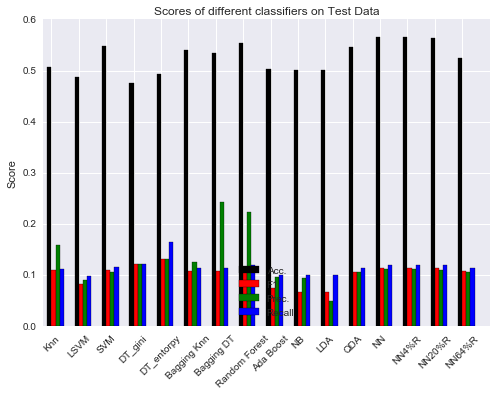

In [13]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 6)
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_NN2),
           metrics.accuracy_score(y_deploy, y_pred_NN3)]

PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN2, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN3, average="macro")]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN2, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN3, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN1, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN2, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN3, average="macro")]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.6)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN4%R' , 'NN20%R' , 'NN64%R']
ax.set_xticks(ind+width)
plt.rcParams['figure.figsize'] = (15, 12)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8 )
plt.show()

# Compute Confusion Matrix

In [14]:
iris = datasets.load_iris()
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (15, 6)
targetLabel = ['0','1','2','3', '4', '5', '6', '7', '8', '9']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(targetLabel))
    plt.xticks(tick_marks, targetLabel, rotation=45)
    plt.yticks(tick_marks, targetLabel)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute Confusion on Knn

Confusion matrix, without normalization
[[332460 167497    959    225     16     51      1      0      0      0]
 [245055 174410   2311    597     83     41      1      0      0      0]
 [ 24663  22057    708    174     19      1      0      0      0      0]
 [  8984  11667    357    109      4      0      0      0      0      0]
 [  1410   2319    126     24      6      0      0      0      0      0]
 [  1511    447      1      0      0     37      0      0      0      0]
 [   553    783     66     20      2      0      0      0      0      0]
 [    51    152     20      7      0      0      0      0      0      0]
 [     4      8      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[  6.63e-01   3.34e-01   1.91e-03   4.49e-04   3.19e-05   1.02e-04
    2.00e-06   0.00e+00   0.00e+00   0.00e+00]
 [  5.80e-01   4.13e-01   5.47e-03   1.41e-03   1.96e-04   9.70e-05
    2.37e-06   0.0

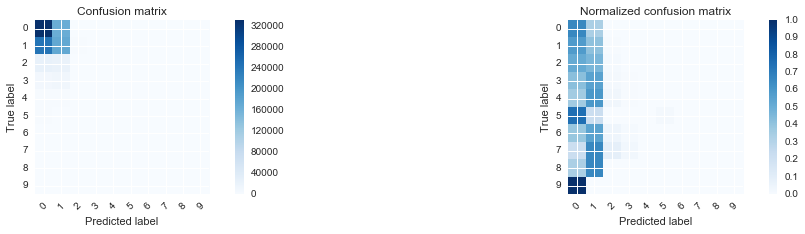

In [15]:
cm = confusion_matrix(y_deploy, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


## Compute Confusion on LSVM

Confusion matrix, without normalization
[[433210  67999      0      0      0      0      0      0      0      0]
 [368066  54432      0      0      0      0      0      0      0      0]
 [ 41828   5794      0      0      0      0      0      0      0      0]
 [ 18895   2226      0      0      0      0      0      0      0      0]
 [  3336    549      0      0      0      0      0      0      0      0]
 [  1354    642      0      0      0      0      0      0      0      0]
 [  1257    167      0      0      0      0      0      0      0      0]
 [   212     18      0      0      0      0      0      0      0      0]
 [     7      5      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.86  0.14  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.87  0.13  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.88  0.12  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.89  0.1

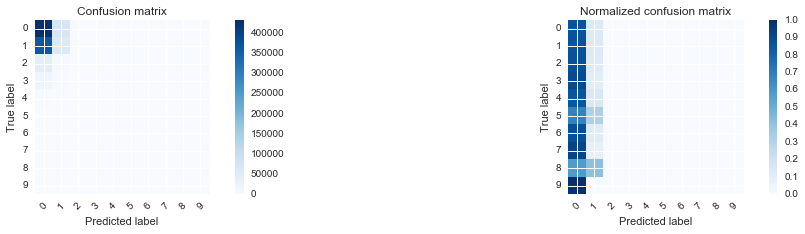

In [16]:
cm = confusion_matrix(y_deploy, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[380411 120798      0      0      0      0      0      0      0      0]
 [255731 166767      0      0      0      0      0      0      0      0]
 [ 23453  24169      0      0      0      0      0      0      0      0]
 [  7405  13716      0      0      0      0      0      0      0      0]
 [   400   3485      0      0      0      0      0      0      0      0]
 [  1679    317      0      0      0      0      0      0      0      0]
 [   431    993      0      0      0      0      0      0      0      0]
 [    20    210      0      0      0      0      0      0      0      0]
 [     3      9      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.76  0.24  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.61  0.39  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.49  0.51  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.35  0.6

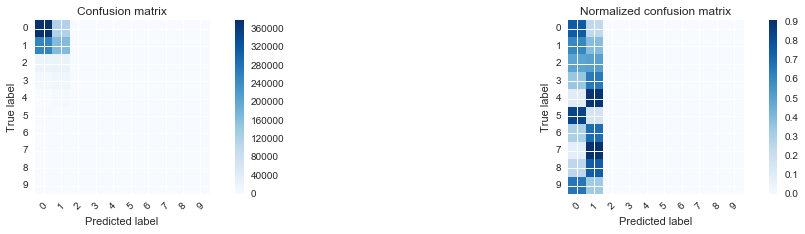

In [17]:
cm = confusion_matrix(y_deploy, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[279601 188487  20806   8664   1622   1143    555     75     88    168]
 [190185 190212  26901  11268   1857    754    921    127     56    217]
 [ 16492  24366   4497   1732    256     61    164     13     11     30]
 [  7202  10819   1765   1133    101     14     66     11      0     10]
 [  1325   1987    293    191     64      1     12      4      1      7]
 [  1198    596     39     10      4     84      2      0      5     58]
 [   361    759    164    120     11      0      5      3      0      1]
 [    62    120     29     17      2      0      0      0      0      0]
 [     3      8      0      0      0      1      0      0      0      0]
 [     0      2      0      1      0      0      0      0      0      0]]
Normalized confusion matrix
[[  5.58e-01   3.76e-01   4.15e-02   1.73e-02   3.24e-03   2.28e-03
    1.11e-03   1.50e-04   1.76e-04   3.35e-04]
 [  4.50e-01   4.50e-01   6.37e-02   2.67e-02   4.40e-03   1.78e-03
    2.18e-03   3.0

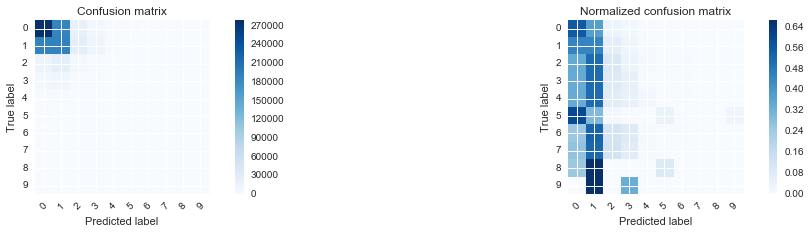

In [18]:
cm = confusion_matrix(y_deploy, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[288415 185504  18619   6076    883   1084    371     13    156     88]
 [182037 198097  27247  11484   1752    653    850    115     80    183]
 [ 15352  24196   5393   2001    371     57    197     29      5     21]
 [  5666  11249   2083   1756    191     17    123     19      0     17]
 [   964   1970    517    231    160      3     24      9      2      5]
 [  1230    643     54     21      2     39      2      0      3      2]
 [   284    751    221    121     28      0     16      3      0      0]
 [    30    114     45     35      4      0      1      0      0      1]
 [     7      4      0      0      1      0      0      0      0      0]
 [     0      2      0      0      0      0      0      0      0      1]]
Normalized confusion matrix
[[  5.75e-01   3.70e-01   3.71e-02   1.21e-02   1.76e-03   2.16e-03
    7.40e-04   2.59e-05   3.11e-04   1.76e-04]
 [  4.31e-01   4.69e-01   6.45e-02   2.72e-02   4.15e-03   1.55e-03
    2.01e-03   2.7

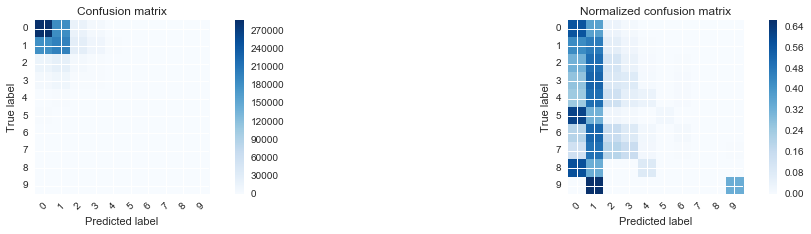

In [19]:
cm = confusion_matrix(y_deploy, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[383483 117726      0      0      0      0      0      0      0      0]
 [265166 157329      3      0      0      0      0      0      0      0]
 [ 23421  24200      1      0      0      0      0      0      0      0]
 [  7708  13413      0      0      0      0      0      0      0      0]
 [  1627   2258      0      0      0      0      0      0      0      0]
 [  1770    226      0      0      0      0      0      0      0      0]
 [   392   1031      1      0      0      0      0      0      0      0]
 [    22    208      0      0      0      0      0      0      0      0]
 [     6      6      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[  7.65e-01   2.35e-01   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00]
 [  6.28e-01   3.72e-01   7.10e-06   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   0.0

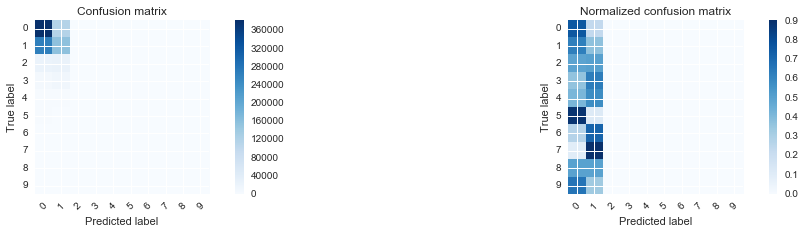

In [20]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[366897 134024    271     16      0      0      0      0      0      1]
 [255394 166365    679     57      2      1      0      0      0      0]
 [ 23049  24342    201     30      0      0      0      0      0      0]
 [  8553  12436     97     34      0      0      0      1      0      0]
 [  1818   2061      5      0      1      0      0      0      0      0]
 [  1596    396      1      0      0      2      0      0      0      1]
 [   448    965      8      3      0      0      0      0      0      0]
 [    44    176      2      8      0      0      0      0      0      0]
 [     7      5      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[  7.32e-01   2.67e-01   5.41e-04   3.19e-05   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   2.00e-06]
 [  6.04e-01   3.94e-01   1.61e-03   1.35e-04   4.73e-06   2.37e-06
    0.00e+00   0.0

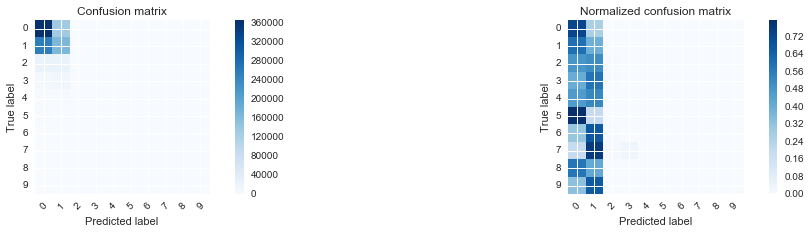

In [21]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[367022 133647    479     51      5      3      2      0      0      0]
 [233749 186809   1725    178     32      0      5      0      0      0]
 [ 19142  27776    625     74      3      0      2      0      0      0]
 [  7464  13273    257    120      4      0      1      2      0      0]
 [  1393   2434     49      6      3      0      0      0      0      0]
 [  1609    381      1      0      0      5      0      0      0      0]
 [   333   1012     61     18      0      0      0      0      0      0]
 [    41    170     12      7      0      0      0      0      0      0]
 [     8      4      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[  7.32e-01   2.67e-01   9.56e-04   1.02e-04   9.98e-06   5.99e-06
    3.99e-06   0.00e+00   0.00e+00   0.00e+00]
 [  5.53e-01   4.42e-01   4.08e-03   4.21e-04   7.57e-05   0.00e+00
    1.18e-05   0.0

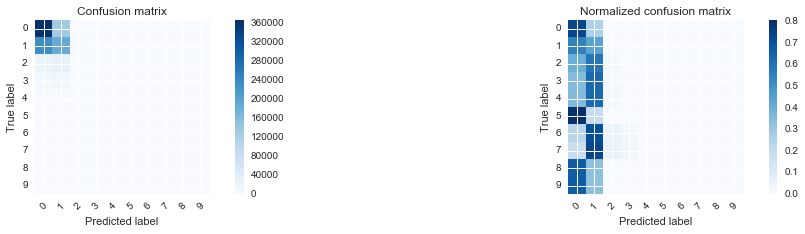

In [22]:
cm = confusion_matrix(y_deploy, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[482705  18504      0      0      0      0      0      0      0      0]
 [402433  20065      0      0      0      0      0      0      0      0]
 [ 44844   2778      0      0      0      0      0      0      0      0]
 [ 19748   1373      0      0      0      0      0      0      0      0]
 [  3430    455      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [  1321    103      0      0      0      0      0      0      0      0]
 [   204     26      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.96  0.04  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.95  0.05  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.94  0.06  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.93  0.0

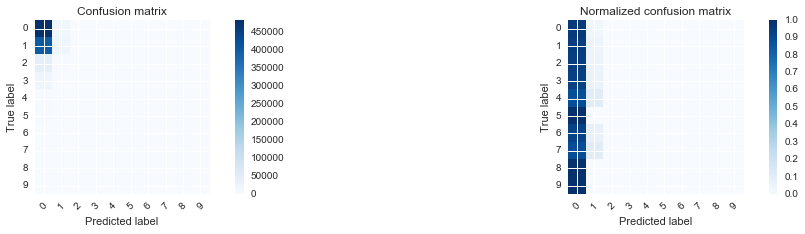

In [23]:
cm = confusion_matrix(y_deploy, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[501136     73      0      0      0      0      0      0      0      0]
 [422392     94      0      0      0      0      0     12      0      0]
 [ 47595     22      0      0      0      0      0      5      0      0]
 [ 21112      8      0      0      0      0      0      1      0      0]
 [  3874     10      0      0      0      0      0      1      0      0]
 [  1994      2      0      0      0      0      0      0      0      0]
 [  1421      2      0      0      0      0      0      1      0      0]
 [   230      0      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[  1.00e+00   1.46e-04   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00]
 [  1.00e+00   2.22e-04   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   2.8

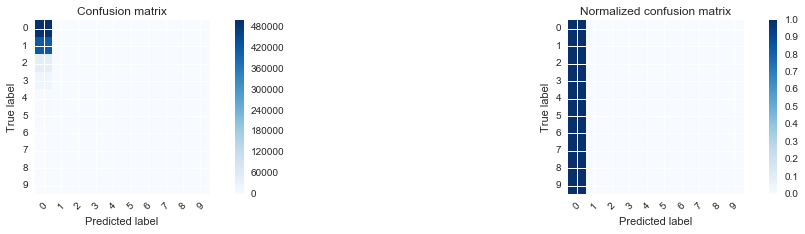

In [24]:
cm = confusion_matrix(y_deploy, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[501209      0      0      0      0      0      0      0      0      0]
 [422498      0      0      0      0      0      0      0      0      0]
 [ 47622      0      0      0      0      0      0      0      0      0]
 [ 21121      0      0      0      0      0      0      0      0      0]
 [  3885      0      0      0      0      0      0      0      0      0]
 [  1996      0      0      0      0      0      0      0      0      0]
 [  1424      0      0      0      0      0      0      0      0      0]
 [   230      0      0      0      0      0      0      0      0      0]
 [    12      0      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.

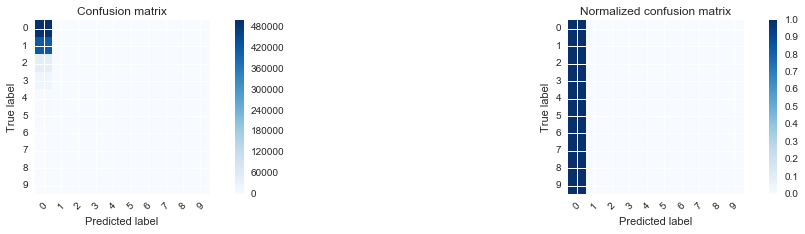

In [25]:
cm = confusion_matrix(y_deploy, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[413086  88123      0      0      0      0      0      0      0      0]
 [289923 132575      0      0      0      0      0      0      0      0]
 [ 26996  20626      0      0      0      0      0      0      0      0]
 [  9852  11269      0      0      0      0      0      0      0      0]
 [  1113   2772      0      0      0      0      0      0      0      0]
 [  1812    184      0      0      0      0      0      0      0      0]
 [   559    865      0      0      0      0      0      0      0      0]
 [    47    183      0      0      0      0      0      0      0      0]
 [     6      6      0      0      0      0      0      0      0      0]
 [     3      0      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.82  0.18  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.69  0.31  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.57  0.43  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.47  0.5

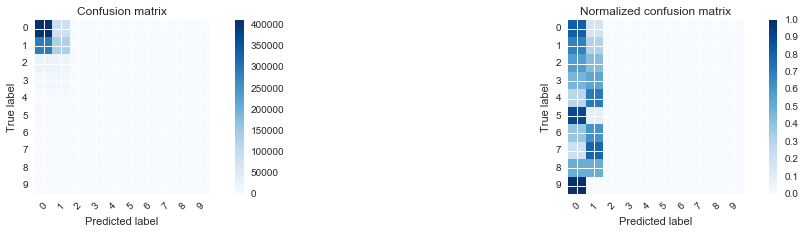

In [26]:
cm = confusion_matrix(y_deploy, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[370971 130238      0      0      0      0      0      0      0      0]
 [227039 195459      0      0      0      0      0      0      0      0]
 [ 18921  28701      0      0      0      0      0      0      0      0]
 [  4548  16573      0      0      0      0      0      0      0      0]
 [   192   3693      0      0      0      0      0      0      0      0]
 [  1774    222      0      0      0      0      0      0      0      0]
 [   299   1123      0      2      0      0      0      0      0      0]
 [     1    229      0      0      0      0      0      0      0      0]
 [     2     10      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.74  0.26  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.54  0.46  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.4   0.6   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.22  0.7

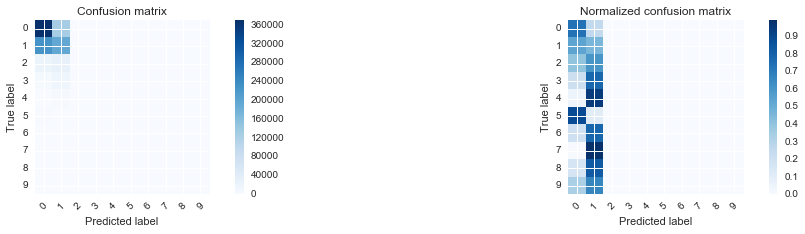

In [27]:
cm = confusion_matrix(y_deploy, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 4% neurals removed

Confusion matrix, without normalization
[[376899 124310      0      0      0      0      0      0      0      0]
 [233024 189474      0      0      0      0      0      0      0      0]
 [ 19434  28188      0      0      0      0      0      0      0      0]
 [  4804  16317      0      0      0      0      0      0      0      0]
 [   220   3665      0      0      0      0      0      0      0      0]
 [  1774    222      0      0      0      0      0      0      0      0]
 [   310   1112      0      2      0      0      0      0      0      0]
 [     1    229      0      0      0      0      0      0      0      0]
 [     2     10      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.75  0.25  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.55  0.45  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.41  0.59  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.23  0.7

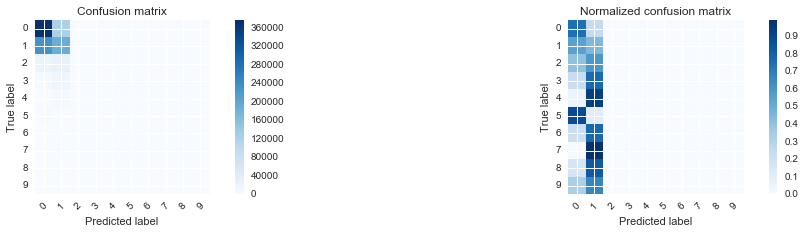

In [28]:
cm = confusion_matrix(y_deploy, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 20% neurals removed


Confusion matrix, without normalization
[[367094 134109      0      0      0      6      0      0      0      0]
 [224857 197631      0      0      0     10      0      0      0      0]
 [ 18763  28858      0      0      0      1      0      0      0      0]
 [  4599  16521      0      0      0      1      0      0      0      0]
 [   209   3675      0      0      0      1      0      0      0      0]
 [  1769    227      0      0      0      0      0      0      0      0]
 [   302   1122      0      0      0      0      0      0      0      0]
 [     0    230      0      0      0      0      0      0      0      0]
 [     1     11      0      0      0      0      0      0      0      0]
 [     2      1      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[  7.32e-01   2.68e-01   0.00e+00   0.00e+00   0.00e+00   1.20e-05
    0.00e+00   0.00e+00   0.00e+00   0.00e+00]
 [  5.32e-01   4.68e-01   0.00e+00   0.00e+00   0.00e+00   2.37e-05
    0.00e+00   0.0

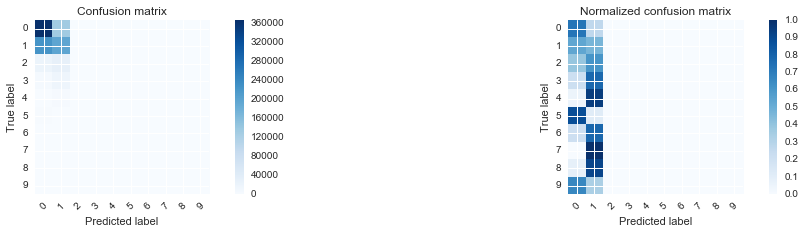

In [29]:
cm = confusion_matrix(y_deploy, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

#### Compute Confusion on NN 64% neurals removed

Confusion matrix, without normalization
[[259583 241626      0      0      0      0      0      0      0      0]
 [157622 264876      0      0      0      0      0      0      0      0]
 [ 13316  34306      0      0      0      0      0      0      0      0]
 [  3559  17562      0      0      0      0      0      0      0      0]
 [   227   3658      0      0      0      0      0      0      0      0]
 [  1179    817      0      0      0      0      0      0      0      0]
 [   218   1206      0      0      0      0      0      0      0      0]
 [     5    225      0      0      0      0      0      0      0      0]
 [     0     12      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]
Normalized confusion matrix
[[ 0.52  0.48  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.37  0.63  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.28  0.72  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.17  0.8

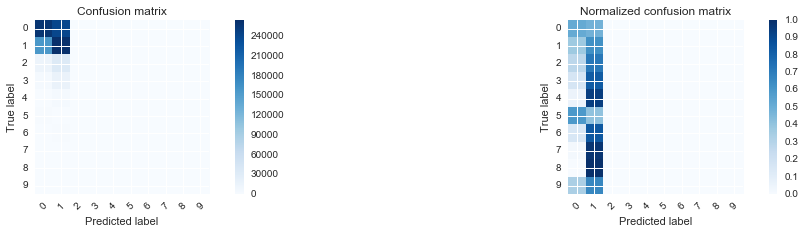

In [30]:
cm = confusion_matrix(y_deploy, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()